In [1]:
import numpy as np

def create_pareto(PE_performances):
    Parento_Frontiers = {}
    for number_pes, results in PE_performances.items():
        # Collect from results
        performance_values = [x['performance'] for x in results]
        resource_percent_max = [x['resources_%'] for x in results]
        convergence_values = [x['convergence_value'] for x in results]
        
        # Identify the Pareto frontier
        pareto_indices = []
        for i in range(len(resource_percent_max)):
            is_pareto = True
            for j in range(len(resource_percent_max)):
                if resource_percent_max[j] <= resource_percent_max[i] and convergence_values[j] <= convergence_values[i] and (resource_percent_max[j] < resource_percent_max[i] or convergence_values[j] < convergence_values[i]):
                    is_pareto = False
                    break
            if is_pareto:
                pareto_indices.append(i)

        # Extract Pareto frontier
        pareto_resource = np.array([resource_percent_max[i] for i in pareto_indices])
        pareto_convergence = np.array([convergence_values[i] for i in pareto_indices])

        # Sort the Pareto frontier by both x-coordinate and y-coordinate
        sorted_indices = np.lexsort((pareto_convergence, pareto_resource))
        pareto_resource_sorted = pareto_resource[sorted_indices]
        pareto_convergence_sorted = pareto_convergence[sorted_indices]

        Parento_Frontiers[number_pes] = {'resources': pareto_resource_sorted, 'convergence': pareto_convergence_sorted}

    return Parento_Frontiers


def get_best_convergence_at_ru(PE_performances):
    best_convergence_at_ru = {}
    for number_pes, results in PE_performances.items():
        best_convergence = {}
        for result in results:
            ru = result['resources_%']
            convergence = result['convergence_value']
            if ru not in best_convergence or convergence < best_convergence[ru]:
                best_convergence[ru] = convergence
        best_convergence_sorted = {k: v for k, v in sorted(best_convergence.items())}
        best_convergence_values = list(best_convergence_sorted.values())
        best_convergence_resources = list(best_convergence_sorted.keys())
        best_convergence_at_ru[number_pes] = {'resources': best_convergence_resources, 'convergence': best_convergence_values}
    return best_convergence_at_ru

### Analyse all Designs

In [2]:
import json
import matplotlib.pyplot as plt

from pathlib import Path

# Load the JSON data_design
filename = '100_nodes_100_factors_sf_65_random_fixed'

# Specify the path for the new folder
folder_path = Path(f"images/{filename}")
folder_path.mkdir(parents=True, exist_ok=True)

# Extract design data
with open(f"designs/{filename}.json") as f:
    data_design = json.load(f)

graph = data_design.get('inp_graph_topology', [])
designs = data_design.get('all_designs', [])

# Extract associated simulation data
with open(f"simulations/{filename}.json") as f:
    data_simulations = json.load(f)

# Initialize lists to store calculated values
all_performance_values = []
all_convergence_values = []
all_resource_percent_max = []
all_number_pes_values = []
all_node_updts_per_pe_values = []

# Initialize lists to store calculated values
PE_performances = {}

# Iterate through each design
for design in designs:
    # Calculate performance value
    performance_value = (design['design']['number_pes'] * design['design']['nodes_updt_per_pe']) / design['latency']['latency_total']
    all_performance_values.append(performance_value)

    # Calculate convergence value
    for value in data_simulations:
        if value['number_pes'] == design['design']['number_pes'] and value['nodes_updt_per_pe'] == design['design']['nodes_updt_per_pe'] and value['capping'] == design['design']['capping'] and value['policy'] == design['design']['policy']:
            stream_passes = value['stream_passes']
            policy = value['policy']
            print(policy)
            capping = value['capping']
            print(capping)
            print("---------")
    convergence_value = design['latency']['latency_total'] * stream_passes
    all_convergence_values.append(convergence_value)

    # Get maximum resource percentage
    all_resource_percent_max.append(max(design['resources']['resources_%'].values()))

    # Get number_pes
    all_number_pes_values.append(design['design']['number_pes'])
    all_node_updts_per_pe_values.append(design['design']['nodes_updt_per_pe'])

    if design['design']['number_pes'] not in PE_performances:
        PE_performances[design['design']['number_pes']] = []

    build_dict = {}
    build_dict['performance'] = performance_value
    build_dict['convergence_value'] = convergence_value
    build_dict['resources_%'] = max(design['resources']['resources_%'].values())
    build_dict['number_pes'] = design['design']['number_pes']
    build_dict['nodes_updt_per_pe'] = design['design']['nodes_updt_per_pe']
    build_dict['policy'] = policy
    build_dict['capping'] = capping

    PE_performances[design['design']['number_pes']].append(build_dict)

random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
---------
random
None
---------
random
None
---------
random
1
---------
random
1
---------
random
1
---------
random
None
----

In [3]:
data_design

{'inp_nodes_updt_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100],
 'compute_blocks': ['inv', 'mul', 'add', 'sub'],
 'inp_compute_unit_parameterisations': [{'inv': 1,
   'mul': 1,
   'add': 1,
   'sub': 1},
  {'inv': 1, 'mul': 1, 'add': 1, 'sub': 3},
  {'inv': 1, 'mul': 1, 'add': 3, 'sub': 1},
  {'inv': 1, 'mul': 1, 'add': 3, 'sub': 3},
  {'inv': 1, 'mul': 3, 'add': 1, 'sub': 1},
  {'inv': 1, 'mul': 3, 'add': 1, 'sub': 3},
  {'inv': 1, 'mul': 3, '

In [4]:
data_simulations

[{'number_pes': 1,
  'nodes_updt_per_pe': 21,
  'capping': None,
  'policy': 'fixed',
  'stream_passes': 40.0},
 {'number_pes': 2,
  'nodes_updt_per_pe': 21,
  'capping': None,
  'policy': 'fixed',
  'stream_passes': 22.0},
 {'number_pes': 1,
  'nodes_updt_per_pe': 21,
  'capping': 1,
  'policy': 'fixed',
  'stream_passes': 86.28},
 {'number_pes': 2,
  'nodes_updt_per_pe': 21,
  'capping': 1,
  'policy': 'fixed',
  'stream_passes': 44.85},
 {'number_pes': 1,
  'nodes_updt_per_pe': 22,
  'capping': None,
  'policy': 'fixed',
  'stream_passes': 39.0},
 {'number_pes': 2,
  'nodes_updt_per_pe': 22,
  'capping': None,
  'policy': 'fixed',
  'stream_passes': 21.0},
 {'number_pes': 1,
  'nodes_updt_per_pe': 22,
  'capping': 1,
  'policy': 'fixed',
  'stream_passes': 83.89},
 {'number_pes': 2,
  'nodes_updt_per_pe': 22,
  'capping': 1,
  'policy': 'fixed',
  'stream_passes': 42.75},
 {'number_pes': 1,
  'nodes_updt_per_pe': 23,
  'capping': None,
  'policy': 'fixed',
  'stream_passes': 37.0},


In [5]:
PE_performances

{1: [{'performance': 41580.04158004158,
   'convergence_value': 0.023884055,
   'resources_%': 26.42105263157895,
   'number_pes': 1,
   'nodes_updt_per_pe': 1,
   'policy': 'random',
   'capping': None},
  {'performance': 41580.04158004158,
   'convergence_value': 0.046734922000000005,
   'resources_%': 26.42105263157895,
   'number_pes': 1,
   'nodes_updt_per_pe': 1,
   'policy': 'random',
   'capping': 1},
  {'performance': 31836.99458771092,
   'convergence_value': 0.031193270999999998,
   'resources_%': 26.42105263157895,
   'number_pes': 1,
   'nodes_updt_per_pe': 1,
   'policy': 'random',
   'capping': None},
  {'performance': 31836.99458771092,
   'convergence_value': 0.0610371684,
   'resources_%': 26.42105263157895,
   'number_pes': 1,
   'nodes_updt_per_pe': 1,
   'policy': 'random',
   'capping': 1},
  {'performance': 41580.04158004158,
   'convergence_value': 0.023884055,
   'resources_%': 27.18984962406015,
   'number_pes': 1,
   'nodes_updt_per_pe': 1,
   'policy': 'rand

### Build PE Performances for each Design Type

In [6]:
# inputs
policy_lst = ['random', 'fixed']
capping_lst = [1, None]

design_performances = {}

for policy in policy_lst:
    for capping in capping_lst:
        # create key and filter PE performances
        key_name = f'policy_{policy}_capping_{capping}'
        print(key_name)

        tmp_PE_performances = PE_performances

        new_PE_performances = {}

        for key, values in tmp_PE_performances.items():
            new_lst = []
            for entry in values:
                if entry['policy'] == policy:
                    if entry['capping'] == capping:
                        new_lst.append(entry)
                    elif entry['capping'] is None and capping is None:
                        print(f"policy = {policy}, capping = {capping}")
                        new_lst.append(entry)

            new_PE_performances[key] = new_lst

        design_performances[key_name] = new_PE_performances

        design_performances[key_name] = get_best_convergence_at_ru(new_PE_performances)

policy_random_capping_1
policy_random_capping_None
policy_fixed_capping_1
policy_fixed_capping_None


In [7]:
design_performances

{'policy_random_capping_1': {1: {'resources': [26.42105263157895,
    26.44736842105263,
    26.575187969924812,
    26.704887218045112,
    27.10902255639098,
    27.112781954887218,
    27.18984962406015,
    27.216165413533833,
    27.343984962406015,
    27.473684210526315,
    27.877819548872182,
    27.88157894736842,
    27.958646616541355,
    27.984962406015036,
    28.112781954887218,
    28.242481203007518,
    28.321428571428573,
    28.347744360902254,
    28.475563909774436,
    28.605263157894736,
    28.646616541353385,
    28.650375939849624,
    28.701127819548873,
    29.0093984962406,
    29.013157894736842,
    29.090225563909776,
    29.116541353383457,
    29.24436090225564,
    29.37406015037594,
    29.469924812030076,
    29.778195488721803,
    29.781954887218046,
    29.85902255639098,
    29.88533834586466,
    30.013157894736842,
    30.142857142857142,
    30.23872180451128,
    30.546992481203006,
    30.55075187969925,
    30.601503759398497,
    30.832

### Plot Convergence against RU for each PE

In [8]:
# Iterate over each Pareto frontier
# for policy in policy_lst:
#     for capping in capping_lst:
#         # create key and filter PE performances
#         key = f'policy_{policy}_capping_{capping}' 
        
#         # Pareto Frontier
#         Parento_Frontiers = design_performances[key]

#         # Initialize the plot
#         plt.figure(figsize=(10, 6))

#         # create key and filter PE performances
#         for number_pes, frontier_data in Parento_Frontiers.items():
            
#             resources = frontier_data['resources']
#             performance_values = frontier_data['convergence']
            
#             # Plot the Pareto frontier and get the color used
#             if len(resources) != 0 or len(performance_values) != 0:
#                 line, = plt.plot(resources, performance_values, label=f"PEs: {number_pes}")
#                 color = line.get_color()  # Get color used for this plot
                
#                 # Plot horizontal line at the final point with the same color
#                 plt.hlines(y=performance_values[-1], xmin=resources[-1], xmax=min(resources[-1]+15, 100), color=color, linestyle='--')

#         # Add labels and legend
#         plt.xlabel('Maximum Resource Utilization (as a Percentage % of Total Available)', fontsize=10)
#         plt.ylabel('Convergence (s)', fontsize=10)
#         plt.title(f"Convergence against Resource Utilization (RU): G (N = {graph['N']}, k = {graph['k']}) - (Policy = {policy} and Capping = {capping})", fontsize=12)
#         plt.legend()

#         # Set y-axis to log scale if needed
#         plt.yscale('log')

#         # Show the plot
#         plt.grid(True)

#         # plt.savefig(f"images/n_10_k_20_analysis_pe_plot_convergence.png") 
#         plt.show()

/tmp/ipykernel_856238/3831333087.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bright_cmap = plt.cm.get_cmap('tab10')


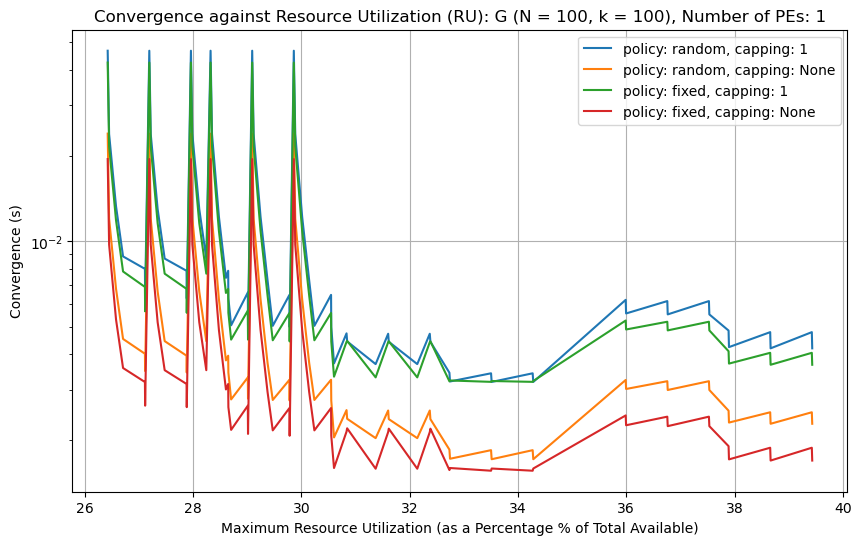

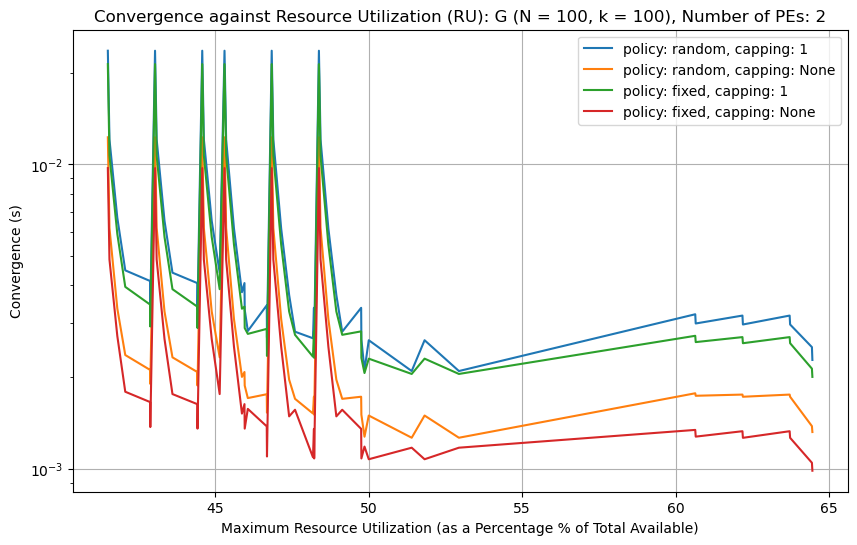

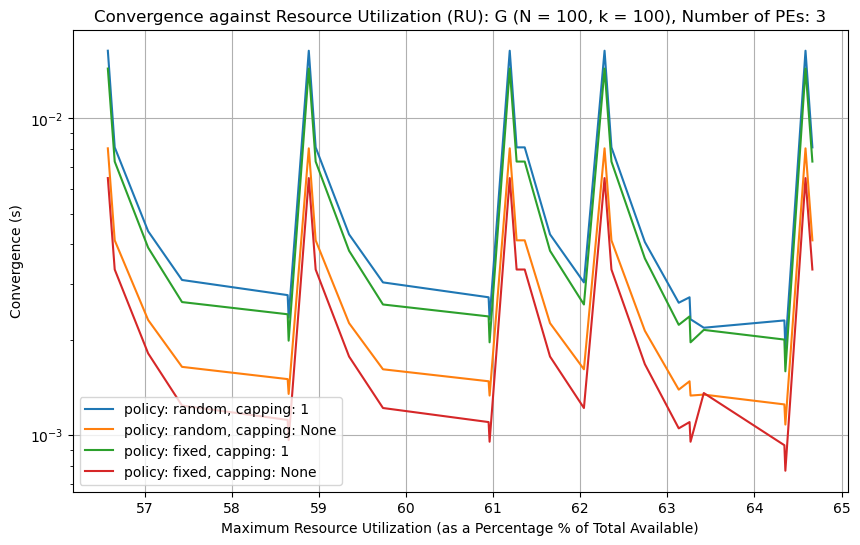

In [13]:
import matplotlib.pyplot as plt

# Initialize lists to store handles and labels for the legend
handles = []
labels = []



# Define a brighter colormap
bright_cmap = plt.cm.get_cmap('tab10')

number_pes_list = [1, 2, 3]

for number_pes in number_pes_list:

    # Initialize the plot outside the loop
    plt.figure(figsize=(10, 6))

    # Iterate over each Pareto frontier
    for policy_idx, policy in enumerate(policy_lst):
        for capping_idx, capping in enumerate(capping_lst):
            # create key and filter PE performances
            key = f'policy_{policy}_capping_{capping}' 

            frontier_data = design_performances[key][number_pes]
            resources = frontier_data['resources']
            performance_values = frontier_data['convergence']

            # Plot the Pareto frontier with a unique color for each policy-capping pair
            if len(resources) != 0 or len(performance_values) != 0:
                color = bright_cmap((policy_idx * len(capping_lst) + capping_idx) % bright_cmap.N)
                line, = plt.plot(resources, performance_values, color=color)

                # Plot horizontal line at the final point with the same color
                # plt.hlines(y=performance_values[-1], xmin=resources[-1], xmax=min(resources[-1]+15, 100), color=color, linestyle='--')
                
                # Append handles and labels for the legend
                label = f"policy: {policy}, capping: {capping}"
                if label not in labels:
                    handles.append(line)
                    labels.append(label)

    # Add labels and legend
    plt.xlabel('Maximum Resource Utilization (as a Percentage % of Total Available)', fontsize=10)
    plt.ylabel('Convergence (s)', fontsize=10)
    plt.title(f"Convergence against Resource Utilization (RU): G (N = {graph['N']}, k = {graph['k']}), Number of PEs: {number_pes}", fontsize=12)
    plt.legend(handles, labels)

    # Set y-axis to log scale if needed
    plt.yscale('log')

    # Show the plot
    plt.grid(True)
    plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# # Initialize lists to store handles and labels for the legend
# handles = []
# labels = []

# # Initialize the plot outside the loop
# plt.figure(figsize=(10, 6))

# # Define a brighter colormap
# bright_cmap = plt.cm.get_cmap('tab10')

# number_pes_list = [1, 2, 3]

# for number_pes in number_pes_list:
#     # Iterate over each Pareto frontier
#     for policy_idx, policy in enumerate(policy_lst):
#         for capping_idx, capping in enumerate(capping_lst):
#             # create key and filter PE performances
#             key = f'policy_{policy}_capping_{capping}' 

#             frontier_data = design_performances[key][number_pes]
#             resources = frontier_data['resources']
#             performance_values = frontier_data['convergence']

#             # Plot the Pareto frontier with a unique color for each policy-capping pair
#             if len(resources) != 0 or len(performance_values) != 0:
#                 color = bright_cmap((policy_idx * len(capping_lst) + capping_idx) % bright_cmap.N)
#                 line, = plt.plot(resources, performance_values, color=color)

#                 # Plot horizontal line at the final point with the same color
#                 plt.hlines(y=performance_values[-1], xmin=resources[-1], xmax=min(resources[-1]+15, 100), color=color, linestyle='--')
                
#                 # Append handles and labels for the legend
#                 label = f"policy: {policy}, capping: {capping}"
#                 if label not in labels:
#                     handles.append(line)
#                     labels.append(label)

#     # Add labels and legend
#     plt.xlabel('Maximum Resource Utilization (as a Percentage % of Total Available)', fontsize=10)
#     plt.ylabel('Convergence (s)', fontsize=10)
#     plt.title(f"Convergence against Resource Utilization (RU): G (N = {graph['N']}, k = {graph['k']}), Number of PEs: {number_pes}", fontsize=12)
#     plt.legend(handles, labels)

#     # Set y-axis to log scale if needed
#     plt.yscale('log')

#     # Show the plot
#     plt.grid(True)
#     plt.show()